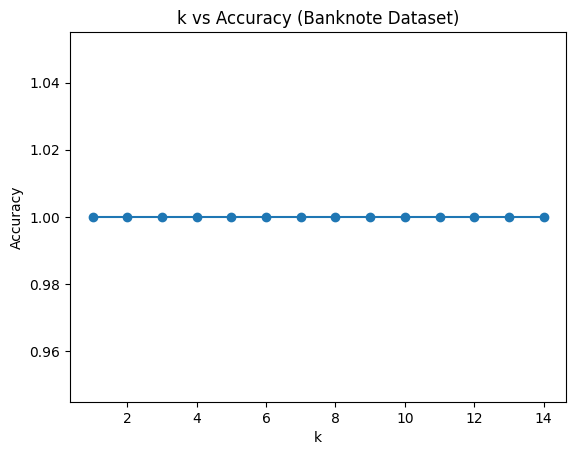

kNN Accuracy: 1.000
Cross-validation Accuracy: 0.999


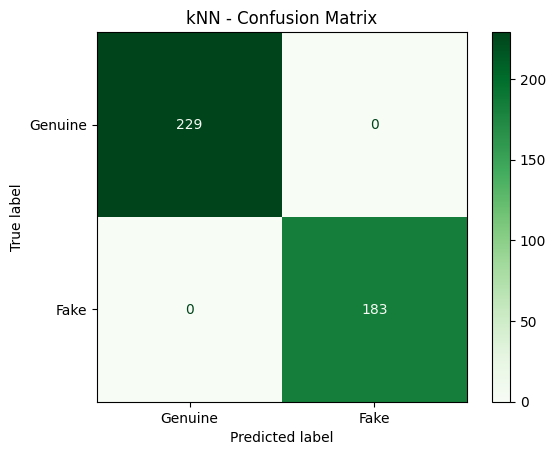

In [1]:
# k-Nearest Neighbors Classifier - Banknote Authentication Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('data/data_banknote_authentication.csv', header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Test accuracy for different k
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('k vs Accuracy (Banknote Dataset)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Choose k=5 (best balance)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate model
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(knn, X_scaled, y, cv=5).mean()

print(f"kNN Accuracy: {acc:.3f}")
print(f"Cross-validation Accuracy: {cv:.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Genuine', 'Fake']).plot(cmap='Greens')
plt.title("kNN - Confusion Matrix")
plt.show()
